# Scikit Learn

![SciKit-Learn Logo](https://github.com/scikit-learn/scikit-learn/raw/master/doc/logos/scikit-learn-logo.png)

Este proyecto se inició en 2007 como un proyecto de Google Summer of Code de David Cournapeau. 


En 2010 Fabián Pedregosa, Gael Varoquaux, Alexandre Gramfort y Vincent Michel de INRIA tomaron el liderazgo del proyecto e hicieron el primer lanzamiento público, el 1 de febrero de 2010. Actualmente es soportado por un equipo de voluntarios y una gran comunidad.

Scikit-learn está escrita principalmente en Python, con algunos algoritmos de núcleo escritos en Cython para conseguir mayor rendimiento.

Ellos se venden como:

* Herramientas simples y eficientes para el análisis predictivo de datos
* Accesible a todo el mundo y reutilizable en diversos contextos
* Construido sobre NumPy, SciPy y matplotlib
* Código abierto, utilizable comercialmente - Licencia BSD


## Usos de Scikit Learn

Scikit Learn es una libreria diseñada para trabajar en machine learning en python, en específico está diseñada para crear modelos de:
  * Clasificación,
  * Regresión, y
  * Clustering.

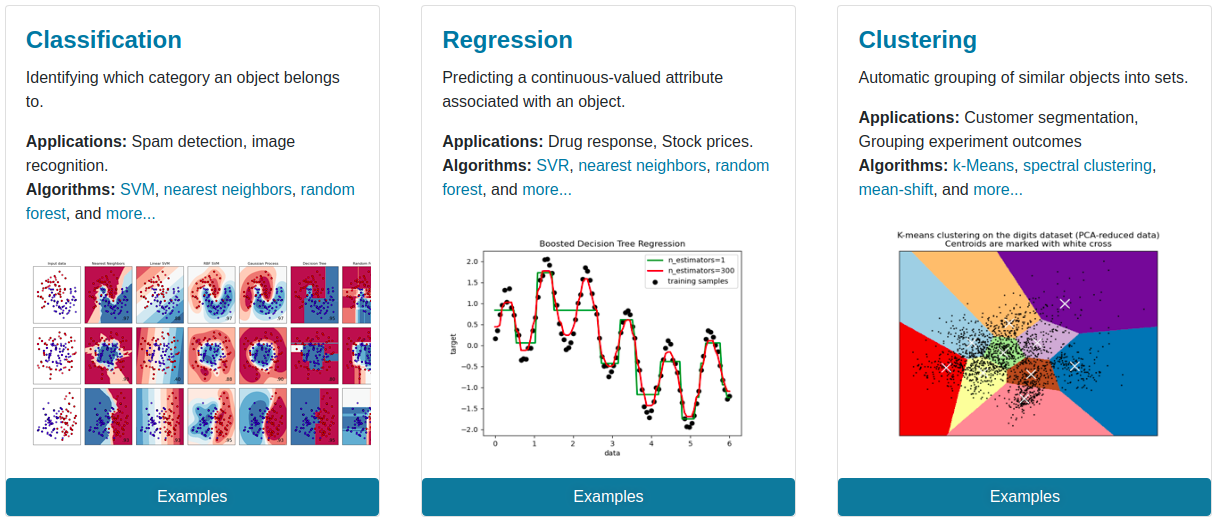

In [ ]:
from IPython.display import Image
Image(filename='Class_REg_Clust.png', width=800)

Además ayuda en otros procesos que se llevan a cabo en el machine learning como
  * Preprocesamiento,
  * Herramientas para selección de modelos, y
  * Herramientas para reducción de dimencionalidad.

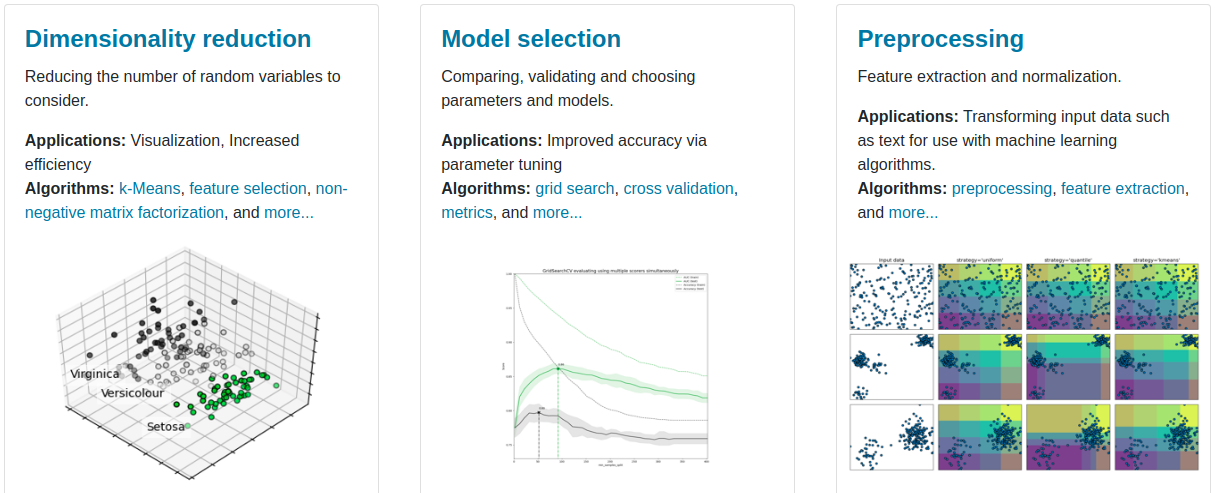

In [ ]:
Image(filename='DimRed_ModSe_Prepr.png', width=800)

## Manos a la obra

En esta introducción a la librería Scikit Learn vamos a crear diferentes modelos de clasificación y hablamos un poco de cada uno de estos. En el camino utilizaremos algunas partes más de la librería pero siempre con el fin de crear diferentes clasificadores

In [ ]:
from sklearn.datasets import make_moons, make_circles
import numpy as np
import mlutils
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
def visualize_tree(tree, feature_names):
    from sklearn.tree import export_graphviz
    with open("/tmp/dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f, impurity=False, class_names=["blue", "red"],
                        feature_names=feature_names, label="none")

    !dot -Tpng /tmp/dt.dot -o /tmp/dt.png
    
hasdot = !which dot
if len(hasdot)==0:
    print ("Installing Graphviz for tree visualization")
    !sudo apt-get update
    !sudo apt-get install -y graphviz

In [ ]:
X, y = make_moons(400, noise=0.1)
Xts, yts = make_moons(100, noise=0.1)

X, y = make_circles(400, noise=0.05)
Xts, yts = make_circles(100, noise=0.05)
X.shape, y.shape

((400, 2), (400,))

In [ ]:
np.unique(y)

array([0, 1])

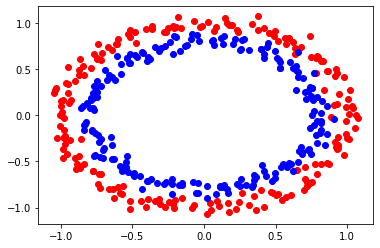

In [ ]:
plt.scatter(X[y==0][:,0], X[y==0][:,1], color="red")
plt.scatter(X[y==1][:,0], X[y==1][:,1], color="blue")

### Arboles de decisión

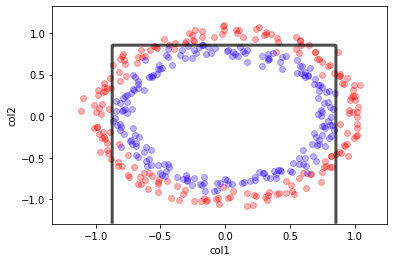

In [ ]:
dt = DecisionTreeClassifier(max_depth=3); dt.fit(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(dt.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)
plt.xlabel("col1"); plt.ylabel("col2");

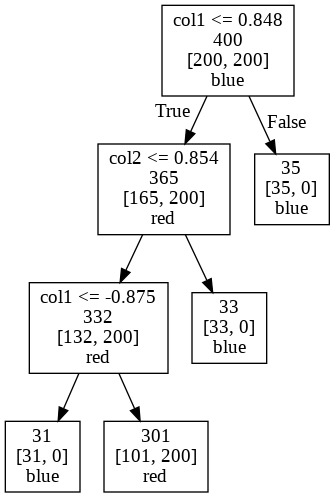

In [ ]:
visualize_tree(dt, ["col1", "col2"])
Image("/tmp/dt.png", width=300)

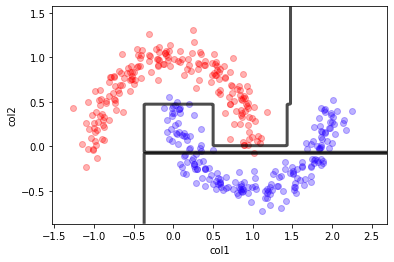

In [ ]:
dt = DecisionTreeClassifier(max_depth=9); 
dt.fit(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(dt.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.xlabel("col1"); plt.ylabel("col2");

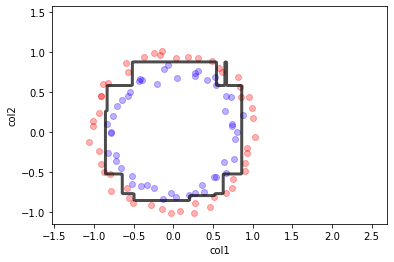

In [ ]:
mlutils.plot_2Ddata(Xts, yts, dots_alpha=.3)
mlutils.plot_2D_boundary(dt.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.xlabel("col1"); plt.ylabel("col2");

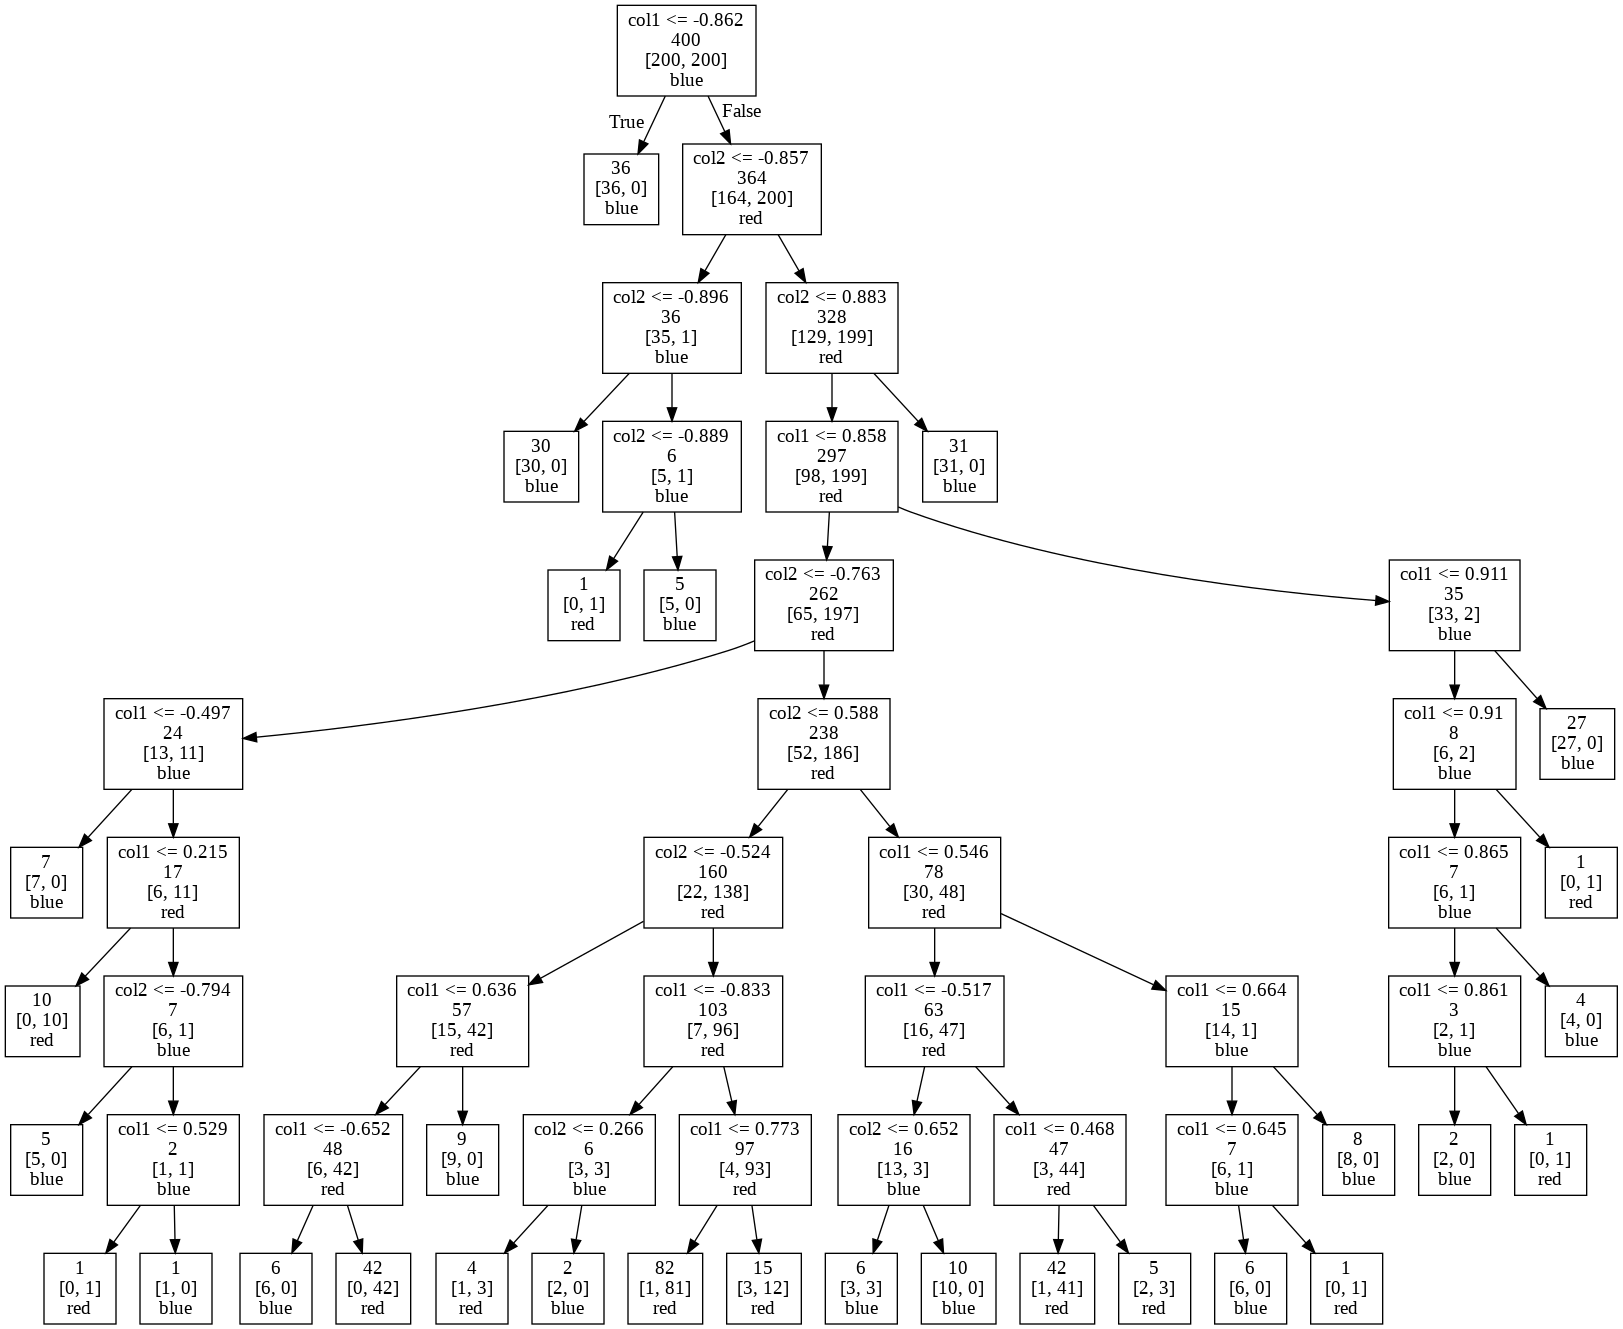

In [ ]:
visualize_tree(dt, ["col1", "col2"])
Image("/tmp/dt.png", width=400)

### Naive Bayes

(0.62045, 0.37955)

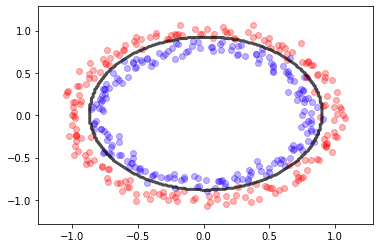

In [ ]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(gb.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

(0.5358, 0.4642)

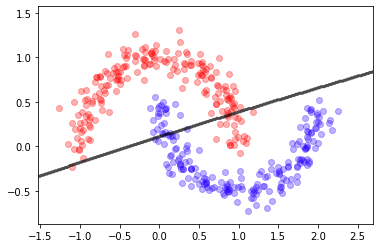

In [ ]:
X, y = make_moons(400, noise=0.1)
gb = GaussianNB()
gb.fit(X,y)

mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(gb.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

### Support Vector Machines

0.9975
number of support vectors 43


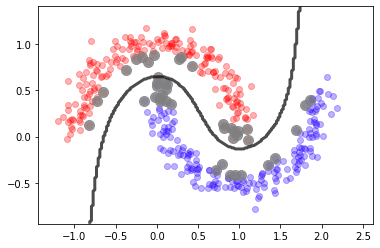

In [ ]:
from sklearn.svm import SVC
X,y = make_blobs(300, centers=2, cluster_std=1)
X, y = make_moons(400, noise=0.1)
sv = SVC(gamma=1)
sv.fit(X,y)
print (sv.score(X,y))
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(sv.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.scatter(sv.support_vectors_[:,0], sv.support_vectors_[:,1], s=100, alpha=.8, color="gray")
print ("number of support vectors", len(sv.support_vectors_))

### Random Forest

0.9875


(0.4683, 0.5317)

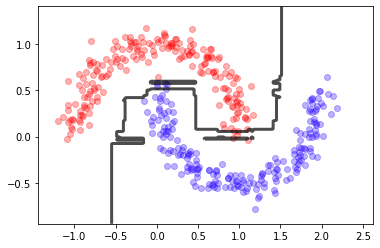

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, max_depth=5)
rf.fit(X,y)
print (rf.score(X,y))
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(rf.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

## Ejemplo Aplicado